In [256]:
### Importing the required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')
from rdkit.Chem import MolStandardize
import joblib

import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors,rdMolDescriptors
#import openpyxl


In [257]:
### Installation of the basic library 
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski
from rdkit.Chem import Crippen
import numpy as np

In [4]:
### Reading the preprocess data from disk 
train_set=pd.read_csv('data/unique_train4_new24.csv')
test_set=pd.read_csv('data/unique_test_new24.csv')
print(train_set.shape)
print(test_set.shape)

(16626, 4)
(1282, 5)


In [5]:
train_smiles_list=train_set[['smiles_canon']]
test_smiles_list=test_set[['smiles_canon']]

In [188]:

### Importing the function of the utility file to generate the descriptors 
import utilities

In [8]:
### Function to calculate errors 
def get_errors(y_true,y_pred,model_name="Model"):   

    err_mae=mae(y_true,y_pred)
    err_rmse=np.sqrt(mse(y_true,y_pred))
    err_r2=r2(y_true,y_pred)
        
    #print(model_name+" MAE:"+str(err_mae)+" RMSE:"+str(err_rmse)+" R2:"+str(err_r2))
  
    return print(model_name+" MAE:"+str(err_mae)+" RMSE:"+str(err_rmse)+" R2:"+str(err_r2))



In [160]:
import pandas as pd
### Taking out the descriptors from the disk 
df_train_38=pd.read_csv('data/df_train_fe.csv')
df_test_38=pd.read_csv('data/df_test_fe.csv') 
df_train_fg=pd.read_csv('data/df_train_fg.csv')
df_test_fg=pd.read_csv('data/df_test_fg.csv') 

In [179]:
df_train_38

,Unnamed: 0,smiles_canon,Solubility,charge,many_double_bonds,atoms_degree_0,atoms_degree_1,atoms_degree_2,atoms_degree_3,atoms_degree_4,...,zero_bonds,conjugated_bonds,bonds_in_ring,chirality_none,chirality_any,chirality_z,chirality_e,n_atoms,n_bonds,n_rings
0,0,O=C1c2ccccc2C(=O)c2c(Cl)cccc21,-5.540000,0,0,0,10,0,42,0,...,0,18,16,26,0,0,0,24,26,3
1,1,NC(N)=NS(=O)(=O)c1ccc(N)cc1,-1.984970,0,0,0,12,2,30,4,...,0,10,6,24,0,0,0,24,24,1
2,2,CCC1C(N)CN1c1cc2c(cc1F)c(=O)c(C(=O)O)cn2C1CC1,-3.912000,0,0,0,23,2,39,32,...,0,16,18,48,0,0,0,45,48,4
3,3,CCC1(CC)OC(=O)c2cc([N+](=O)[O-])ccc21,-3.656000,1,0,0,16,2,24,20,...,0,12,10,31,0,0,0,30,31,2
4,4,O=C1C=Cc2ccccc2C1=NO,-2.937000,0,0,0,8,4,30,0,...,0,14,11,21,0,0,0,20,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,16621,c1cnoc1,0.383095,0,0,0,3,4,9,0,...,0,5,5,8,0,0,0,8,8,1
16622,16622,c1coc(-c2nc3ccccc3[nH]2)c1,-3.414016,-1,0,0,8,4,36,0,...,0,16,15,24,0,0,0,22,24,3
16623,16623,c1nc[nH]n1,0.897170,0,0,0,3,4,9,0,...,0,5,5,8,0,0,0,8,8,1
16624,16624,c1ncc2[nH]cnc2n1,0.619695,0,0,0,4,6,18,0,...,0,10,10,14,0,0,0,13,14,2


In [11]:
### Generate 4 descriptors ....
df4_train=utilities.generate4(train_set.smiles_canon)
df4_test=utilities.generate4(test_set.smiles_canon)
### Generate 17 descriptors ....
df17_train=utilities.generate17(train_set.smiles_canon)
df17_test=utilities.generate17(test_set.smiles_canon)
### Generate 123 descriptors ....
df123_train=utilities.generate123(train_set.smiles_canon)
df123_test=utilities.generate123(test_set.smiles_canon)

In [185]:
df123_train=utilities.generate123(train_set.smiles_canon)
df123_test=utilities.generate123(test_set.smiles_canon)

In [16]:
### Fingerprint 512 ....
df512_train=utilities.fingerprint(train_set.smiles_canon,2,512)
df512_test=utilities.fingerprint(test_set.smiles_canon,2,512)
df1024_train=utilities.fingerprint(train_set.smiles_canon,2,1024)
df1024_test=utilities.fingerprint(test_set.smiles_canon,2,1024)

In [18]:
### Seven feature engineered features 
df_train_fe=utilities.generate_fe(train_set.smiles_canon)
df_test_fe=utilities.generate_fe(test_set.smiles_canon)

In [19]:
X_train1=df4_train.copy()      ### 4  features 
X_test1=df4_test.copy()

In [20]:
X_train2=df17_train.copy()     ### 17 features 
X_test2=df17_test.copy()

In [21]:
X_train5=df123_train.copy()    ### 123 feautures 
X_test5=df123_test.copy()

In [186]:
X_train1=df4_train.copy()      ### 4  features 
X_test1=df4_test.copy()
X_train2=df17_train.copy()     ### 17 features 
X_test2=df17_test.copy()
X_train3=df_train_fg.copy()   ### 7  functional group 
X_test3=df_test_fg.copy()
X_train4=df_train_fe.copy()    ### 7  features engineered features 
X_test4=df_test_fe.copy()
X_train5=df123_train.copy()    ### 125 feautures 
X_test5=df123_test.copy()
X_train6=df512_train.copy()    ### 512 fingerprint 
X_test6=df512_test.copy()
X_train7=df1024_train.copy()   ### 1024 fingerprint 
X_test7=df1024_test.copy()
x_train8=df_train_38.copy()
x_test8=df_test_38.copy()

In [22]:
y_train=train_set.copy()['Solubility']
y_test=test_set.copy()['Solubility']

In [23]:
### Importing library to evaluate the best model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgboost
from xgboost import XGBRegressor


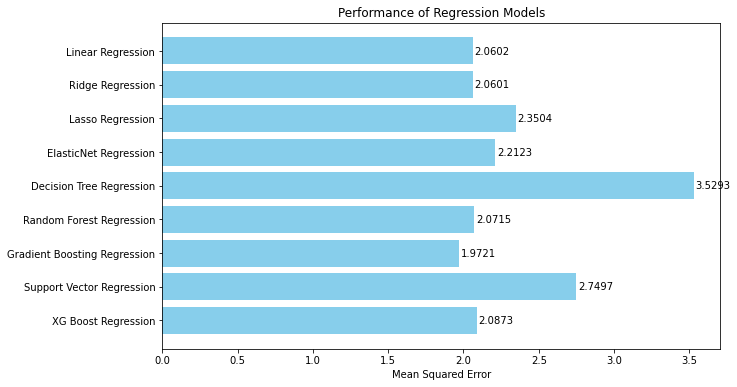

In [51]:
### Function to evaluate the Regresoor model 
def evaluate_model(X, y, model):
    """
    Evaluate a regression model using cross-validation and calculate the mean squared error.
    
    Parameters:
    - X: Feature matrix (DataFrame or array-like)
    - y: Target vector (Series or array-like)
    - model: Regression model object
    
    Returns:
    - Mean squared error (float)
    """
    cv_results = cross_validate(model, X, y, cv=10, scoring='neg_mean_squared_error')
    mse = -np.mean(cv_results['test_score'])
    return mse

# Load your dataset (replace 'dataset.csv' with the actual filename)
#dataset = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')
#dataset.rename(columns={'MEDV': 'PRICE'}, inplace=True)
# Extract feature matrix X and target vector y from the dataset


# Extract feature matrix X and target vector y from the dataset
X = X_train1#dataset.drop(columns=['PRICE'])
y = y_train#dataset['PRICE']

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
     'XG Boost Regression': XGBRegressor()
}

# Evaluate each model and store the results
results = {}
for model_name, model in models.items():
    mse = evaluate_model(X, y, model)
    results[model_name] = mse

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Squared Error'])
results_df.index.name = 'Model'

# Save results to a CSV file
#results_df.to_csv('regression_model_comparison.csv')


plt.figure(figsize=(10, 6))
bars = plt.barh(results_df.index, results_df['Mean Squared Error'], color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Performance of Regression Models')

# Add annotations for each bar
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', 
             va='center', ha='left', color='black')

plt.gca().invert_yaxis()  # Invert y-axis to show the best model on top
plt.show()

In [128]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [200, 400, 600, 800, 1000, 1200],
    'max_depth': [4, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}

# Initialize the model
xgboost_model = xgb.XGBRegressor(nthread=2, scale_pos_weight=1, seed=27)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring=make_scorer(mean_squared_error, greater_is_better=False),
                           cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train1, y_train)

# Print best parameters and lowest RMSE
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", np.sqrt(-grid_search.best_score_))

# Train the model with the best parameters
best_params = grid_search.best_params_
xgboost_model = xgb.XGBRegressor(**best_params)
xgboost_model.fit(X_train1, y_train)

# Evaluate the model
y_pred = xgboost_model.predict(X_test1)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("RMSE on test set: ", rmse)
get_errors(y_test,y_pred,"XGB_4")

Fitting 5 folds for each of 294912 candidates, totalling 1474560 fits


In [24]:

xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                           colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
#xgboost_model=GradientBoostingRegressor(learning_rate= 0.055, max_depth=6,min_samples_split= 3, n_estimators= 122,max_features= 'sqrt',subsample=0.98)

### Fitting the model on train data 
xgboost_model.fit(X_train1,y_train)    
### Predicting on test data 
pred_xgb4 = xgboost_model.predict(X_test1)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_4=utilities.get_errors1(y_test,pred_xgb4,"XGB_4")


In [25]:
xgb_4['Descriptors_Detail']='4 features'

In [26]:
xgb_4

,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
0,XGB_4,0.5608,0.5166,0.7187,0.8761,4 features


In [27]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                           colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train2,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test2)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_17=utilities.get_errors1(y_test,pred_xgb,"XGB_17")



In [28]:
xgb_17['Descriptors_Detail']='17 features'

In [29]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train5,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test5)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_125=utilities.get_errors1(y_test,pred_xgb,"XGB_125")

In [34]:
xgb_125['Descriptors_Detail']='125 features'

In [35]:
### Removing the fisrt two column from the dataframe 
X_train3 = X_train3.drop(X_train3.columns[:2], axis=1)
X_test3 = X_test3.drop(X_test3.columns[:2], axis=1)

In [36]:
### 125 and 7 group added and become 132 features 
X_train9=pd.concat([X_train5, X_train3], axis=1)
X_test9=pd.concat([X_test5, X_test3], axis=1)

In [37]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train9,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test9)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_132=utilities.get_errors1(y_test,pred_xgb,"XGB_132")

In [38]:
xgb_132['Descriptors_Detail']='125 features + 7 f_group'

In [39]:
### Removing the fisrt two column from the dataframe 
df_train_38 = df_train_38.drop(df_train_38.columns[:3], axis=1)
df_test_38 = df_test_38.drop(df_test_38.columns[:3], axis=1)

In [40]:
### 125 + 7 functional group + 38 featured engineered (170)
X_train10=pd.concat([X_train9, df_train_38], axis=1)
X_test10=pd.concat([X_test9, df_test_38], axis=1)

In [41]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train10,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test10)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_170=utilities.get_errors1(y_test,pred_xgb,"XGB_170")

In [42]:
xgb_170['Descriptors_Detail']='125_features + 7_f_group+38 fe_features'

In [43]:
### Fingerprint 512 ....
df64_train=utilities.fingerprint(train_set.smiles_canon,2,64)
df64_test=utilities.fingerprint(test_set.smiles_canon,2,64)
df128_train=utilities.fingerprint(train_set.smiles_canon,2,128)
df128_test=utilities.fingerprint(test_set.smiles_canon,2,128)
df256_train=utilities.fingerprint(train_set.smiles_canon,2,256)
df256_test=utilities.fingerprint(test_set.smiles_canon,2,256)
df512_train=utilities.fingerprint(train_set.smiles_canon,2,512)
df512_test=utilities.fingerprint(test_set.smiles_canon,2,512)
df1024_train=utilities.fingerprint(train_set.smiles_canon,2,1024)
df1024_test=utilities.fingerprint(test_set.smiles_canon,2,1024)

In [44]:
X_train11=pd.concat([X_train10, df64_train], axis=1)
X_test11=pd.concat([X_test10, df64_test], axis=1)

In [45]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train11,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test11)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_234=utilities.get_errors1(y_test,pred_xgb,"XGB_234")

In [46]:
xgb_234['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+64_fp'

In [47]:
X_train12=pd.concat([X_train10, df128_train], axis=1)
X_test12=pd.concat([X_test10, df128_test], axis=1)

In [1]:
import pandas as pd
from rdkit import Chem

def get_functional_groups(smiles):
    functional_groups = {
        # Polar functional groups
        'Hydroxyl Group': '[OH]',
        'Carbonyl Group': 'C=O',
        'Amide Group': 'C(=O)N',
        'Carboxyl Group': 'C(=O)[OH]',
        # Non-polar functional groups
        'Alkyl': '[R]', 
        'Aromatic Rings': 'c',
        'Alkene': 'C=C'
    }
    results = []
    for s in smiles:
        mol = Chem.MolFromSmiles(s)
        fg_presence = {fg: 1 if mol.HasSubstructMatch(Chem.MolFromSmarts(smarts)) else 0 for fg, smarts in functional_groups.items()}
        fg_presence['SMILES'] = s
        results.append(fg_presence)
        data=pd.DataFrame(results)
    return data.iloc[:, :-1]


In [3]:
import numpy as np
import pandas as pd
from rdkit import Chem

def get_charges(smiles):
    if '+' in smiles:
        return 1
    elif '-' in smiles:
        return -1
    else:
        return 0

def get_many_double_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    double_bond_count = sum(1 for bond in mol.GetBonds() if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE)
    return 1 if double_bond_count > 4 else 0

def get_atom_degrees(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_degree_vector = np.zeros(7)
    for bond in bonds:
        atom1 = bond.GetBeginAtom()
        atom2 = bond.GetEndAtom()
        atom_degree_vector = np.array([1 if atom1.GetDegree() == d else 0 for d in range(7)])
        sum_degree_vector += atom_degree_vector
        atom_degree_vector = np.array([1 if atom2.GetDegree() == d else 0 for d in range(7)])
        sum_degree_vector += atom_degree_vector
    return sum_degree_vector.astype(int)

def get_atom_valences(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_valence_vector = np.zeros(7)
    for bond in bonds:
        atom1 = bond.GetBeginAtom()
        atom2 = bond.GetEndAtom()
        atom_valence_vector = np.array([1 if atom1.GetTotalValence() == v else 0 for v in range(7)])
        sum_valence_vector += atom_valence_vector
        atom_valence_vector = np.array([1 if atom2.GetTotalValence() == v else 0 for v in range(7)])
        sum_valence_vector += atom_valence_vector
    return sum_valence_vector.astype(int)

def get_atom_hybridization(smiles):
    hybridizations = [
        Chem.rdchem.HybridizationType.S,
        Chem.rdchem.HybridizationType.SP, 
        Chem.rdchem.HybridizationType.SP2, 
        Chem.rdchem.HybridizationType.SP3, 
        Chem.rdchem.HybridizationType.SP3D, 
        Chem.rdchem.HybridizationType.SP3D2, 
        Chem.rdchem.HybridizationType.UNSPECIFIED]
    
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_hybrid_vector = np.zeros(7)
    for bond in bonds:
        atom1 = bond.GetBeginAtom()
        atom2 = bond.GetEndAtom()
        atom_hybrid_vector = np.array([1 if atom1.GetHybridization() == h else 0 for h in hybridizations])
        sum_hybrid_vector += atom_hybrid_vector
        atom_hybrid_vector = np.array([1 if atom2.GetHybridization() == h else 0 for h in hybridizations])
        sum_hybrid_vector += atom_hybrid_vector
    return sum_hybrid_vector.astype(int)

def get_aromatic_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_aromatic_vector = np.zeros(1)
    for bond in bonds:
        atom1 = bond.GetBeginAtom()
        atom2 = bond.GetEndAtom()
        atom_aromatic_vector = np.array([1 if atom1.GetIsAromatic() else 0])
        sum_aromatic_vector += atom_aromatic_vector
        atom_aromatic_vector = np.array([1 if atom2.GetIsAromatic() else 0])
        sum_aromatic_vector += atom_aromatic_vector
    return sum_aromatic_vector.astype(int)[0]

def get_bond_types(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_bond_type_vector = np.zeros(5)
    for bond in bonds:
        bond_type = bond.GetBondType().name
        bond_type_vector = np.array([1 if t == bond_type else 0 for t in ['SINGLE', 'DOUBLE', 'TRIPLE', 'AROMATIC', 'ZERO']])
        sum_bond_type_vector += bond_type_vector
    return sum_bond_type_vector.astype(int)

def is_conjugated(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_conjugated = np.zeros(1)
    for bond in bonds:
        is_conjugated = 1 if bond.GetIsConjugated() else 0
        conjugation_vector = np.array([is_conjugated])
        sum_conjugated += conjugation_vector
    return sum_conjugated.astype(int)[0]

def get_bonds_in_ring(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    return len(Chem.GetSymmSSSR(mol))

def get_bond_chirality(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    bonds = mol.GetBonds()
    sum_chirality = np.zeros(4)
    for bond in bonds:
        chirality = bond.GetStereo()
        chirality_vector = np.array([1 if chirality == c else 0 for c in [Chem.rdchem.BondStereo.STEREONONE,
                                                                          Chem.rdchem.BondStereo.STEREOANY,
                                                                          Chem.rdchem.BondStereo.STEREOZ,
                                                                          Chem.rdchem.BondStereo.STEREOE]])
        sum_chirality += chirality_vector
    return sum_chirality.astype(int)

def get_n_atoms(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    return mol.GetNumAtoms()

def get_n_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    return mol.GetNumBonds()

def get_n_rings(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    return len(Chem.GetSymmSSSR(mol))

def generate_features38(smiles_list):
    columns = [
        'charge', 'many_double_bonds', 'atoms_degree_0', 'atoms_degree_1',
        'atoms_degree_2', 'atoms_degree_3', 'atoms_degree_4', 'atoms_degree_5',
        'atoms_degree_6', 'atoms_valence_0', 'atoms_valence_1', 'atoms_valence_2',
        'atoms_valence_3', 'atoms_valence_4', 'atoms_valence_5', 'atoms_valence_6',
        'atom_hybridization_S', 'atom_hybridization_SP', 'atom_hybridization_SP2',
        'atom_hybridization_SP3', 'atom_hybridization_SP3D', 'atom_hybridization_SP3D2',
        'atom_hybridization_UNSPECIFIED', 'aromatic_atoms', 'single_bonds', 'double_bonds',
        'triple_bonds', 'aromatic_bonds', 'zero_bonds', 'conjugated_bonds', 'bonds_in_ring',
        'chirality_none', 'chirality_any', 'chirality_z', 'chirality_e', 'n_atoms',
        'n_bonds', 'n_rings'
    ]
    
    features = []
    for smiles in smiles_list:
        charge = get_charges(smiles)
        many_double_bonds = get_many_double_bonds(smiles)
        atom_degrees = get_atom_degrees(smiles).tolist()
        atom_valences = get_atom_valences(smiles).tolist()
        atom_hybridizations = get_atom_hybridization(smiles).tolist()
        aromatic_atoms = get_aromatic_atoms(smiles)
        bond_types = get_bond_types(smiles).tolist()
        conjugated_bonds = is_conjugated(smiles)
        bonds_in_ring = get_bonds_in_ring(smiles)
        bond_chirality = get_bond_chirality(smiles).tolist()
        n_atoms = get_n_atoms(smiles)
        n_bonds = get_n_bonds(smiles)
        n_rings = get_n_rings(smiles)

        feature_row = [
            charge, many_double_bonds, atom_degrees[0], atom_degrees[1],
            atom_degrees[2], atom_degrees[3], atom_degrees[4], atom_degrees[5],
            atom_degrees[6], atom_valences[0], atom_valences[1], atom_valences[2],
            atom_valences[3], atom_valences[4], atom_valences[5], atom_valences[6],
            atom_hybridizations[0], atom_hybridizations[1], atom_hybridizations[2],
            atom_hybridizations[3], atom_hybridizations[4], atom_hybridizations[5],
            atom_hybridizations[6], aromatic_atoms, bond_types[0], bond_types[1],
            bond_types[2], bond_types[3], bond_types[4], conjugated_bonds,
            bonds_in_ring, bond_chirality[0], bond_chirality[1], bond_chirality[2],
            bond_chirality[3], n_atoms, n_bonds, n_rings
        ]
        
        features.append(feature_row)
    
    return pd.DataFrame(features, columns=columns)



In [181]:
xgboost_model_298 = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model_298.fit(X_train12,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model_298.predict(X_test12)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_298=utilities.get_errors1(y_test,pred_xgb,"XGB_298")

In [182]:
xgb_298

,Model_Name,MAE,MSE,RMSE,R2
0,XGB_298,0.4297,0.3209,0.5665,0.923


In [104]:
xgb_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [50]:
df_train2 = pd.concat([X_train12, y_train], axis=1)
df_test2 = pd.concat([X_test12, y_test], axis=1)

In [72]:
### Remove nan and infinity values from the dataset
df_train2 = pd.concat([X_train12, y_train], axis=1)
df_test2 = pd.concat([X_test12, y_test], axis=1)
df_train = df_train2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df_test = df_test2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [73]:
X_train = df_train.iloc[:, :-1]  # All columns except the last one
y_train = df_train.iloc[:, -1] 
X_test = df_test.iloc[:, :-1]  # All columns except the last one
y_test = df_test.iloc[:, -1] 

In [107]:
rf = RandomForestRegressor(
    n_estimators=1000,          # Number of trees
    max_depth=10,              # Maximum depth of each tree
    min_samples_split=2,       # Minimum samples required to split an internal node
    min_samples_leaf=1,        # Minimum samples required to be at a leaf node
    max_features='auto',       # Number of features to consider when looking for the best split
    random_state=42            # Random state for reproducibility
)

### Fitting the model on train data 
rf.fit(X_train,y_train)    
### Predicting on test data 
pred_rf = rf.predict(X_test)
### Calculating the evaluation matrix MAE , RMSE and R2
rf_298=utilities.get_errors1(y_test,pred_rf,"rf_298")

In [108]:
rf_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [109]:
rf_298

,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
0,rf_298,0.4972,0.4093,0.6398,0.9019,125_features + 7_f_group+38 fe_features+128_fp


In [55]:
gb = GradientBoostingRegressor(
    n_estimators=1000,          # Number of boosting stages to be run
    learning_rate=0.01,         # Learning rate shrinks the contribution of each tree
    max_depth=8,               # Maximum depth of the individual estimators
    min_samples_split=2,       # Minimum number of samples required to split an internal node
    min_samples_leaf=1,        # Minimum number of samples required to be at a leaf node
    max_features=None,         # Number of features to consider when looking for the best split
    random_state=42            # Random state for reproducibility
)
### Fitting the model on train data 
gb.fit(X_train,y_train)    
### Predicting on test data 
pred_gb = gb.predict(X_test)
### Calculating the evaluation matrix MAE , RMSE and R2
gb_298=utilities.get_errors1(y_test,pred_gb,"gb_298")

In [56]:
gb_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [58]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [76]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)#, validation_split=0.2)
pred_nn = model.predict(X_test)
### Calculating the evaluation matrix MAE , RMSE and R2
nn_298=utilities.get_errors1(y_test,pred_nn,"nn_298")


Epoch 1/100
520/520 [==============================] - 1s 2ms/step - loss: 2.3337
Epoch 2/100
520/520 [==============================] - 1s 2ms/step - loss: 1.0568
Epoch 3/100
520/520 [==============================] - 1s 2ms/step - loss: 0.8736
Epoch 4/100
520/520 [==============================] - 1s 2ms/step - loss: 0.7432
Epoch 5/100
520/520 [==============================] - 1s 2ms/step - loss: 0.7347
Epoch 6/100
520/520 [==============================] - 1s 2ms/step - loss: 0.6666
Epoch 7/100
520/520 [==============================] - 1s 2ms/step - loss: 0.5979
Epoch 8/100
520/520 [==============================] - 1s 2ms/step - loss: 0.4639
Epoch 9/100
520/520 [==============================] - 1s 2ms/step - loss: 0.4126
Epoch 10/100
520/520 [==============================] - 1s 2ms/step - loss: 0.3882
Epoch 11/100
520/520 [==============================] - 1s 2ms/step - loss: 0.3821
Epoch 12/100
520/520 [==============================] - 1s 2ms/step - loss: 0.3280
Epoch 13/100


In [77]:
nn_298['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+128_fp'

In [79]:
X_train13=pd.concat([X_train10, df256_train], axis=1)
X_test13=pd.concat([X_test10, df256_test], axis=1)

In [80]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train13,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test13)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_426=utilities.get_errors1(y_test,pred_xgb,"XGB_426")

In [81]:
xgb_426['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+256_fp'

In [82]:
X_train14=pd.concat([X_train10, df512_train], axis=1)
X_test14=pd.concat([X_test10, df512_test], axis=1)

In [83]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train14,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test14)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_682=utilities.get_errors1(y_test,pred_xgb,"XGB_682")

In [84]:
xgb_682['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+512_fp'

In [85]:
X_train15=pd.concat([X_train9, df1024_train], axis=1)
X_test15=pd.concat([X_test9, df1024_test], axis=1)

In [86]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
### Fitting the model on train data 
xgboost_model.fit(X_train15,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(X_test15)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_1194=utilities.get_errors1(y_test,pred_xgb,"XGB_1194")

In [87]:
xgb_1194['Descriptors_Detail']='125_features + 7_f_group+38 fe_features+1024_fp'

In [88]:
from sklearn.feature_selection import SelectFromModel

In [89]:
def select_features_lasso(train_data,test_data):
    """
    Selects descriptors from training data then applies on both training and test data 
    """
    
    lasso = Lasso(alpha=0.01,max_iter=10000,random_state=1).fit(train_data.drop(columns=['Solubility']), train_data['Solubility'])
    model = SelectFromModel(lasso, prefit=True)
    X_new_lasso = model.transform(train_data.drop(columns=['Solubility']))
    # Get back the kept features as a DataFrame with dropped columns as all 0s
    selected_features = pd.DataFrame(model.inverse_transform(X_new_lasso), index=train_data.drop(columns=['Solubility']).index, columns=train_data.drop(columns=['Solubility']).columns)
    # Dropped columns have values of all 0s, keep other columns 
    selected_columns_lasso = selected_features.columns[selected_features.var() != 0]
    
    selected_data_train = train_data[selected_columns_lasso]             
    selected_data_test = test_data[selected_columns_lasso]
    selected_data_test = selected_data_test.apply(pd.to_numeric)
    
    print(selected_data_train.columns)
    print("Total selected descriptors by LASSO:",len(selected_data_train.columns))
      
    return selected_data_train, selected_data_test


In [90]:
X_train13=pd.concat([X_train10, y_train], axis=1)
X_test13=pd.concat([X_test10, y_test], axis=1)

In [91]:
y_train1=y_train.copy()
y_test1=y_test.copy()

In [92]:
X_train14=X_train13.copy()
X_test14=X_test13.copy()

In [93]:
### Removing the NAN and infinitive values from the dataset 
X_train14 = X_train14.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_tetst14 = X_test14.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_train1 = y_train1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_test1 = y_test1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [94]:
### Selecting the important features with Lasso technique ...
selected_data_train, selected_data_test = select_features_lasso(X_train14,X_test14)


Index(['MaxEStateIndex', 'MinEStateIndex', 'SPS', 'HeavyAtomMolWt',
       'NumValenceElectrons', 'FpDensityMorgan1', 'BCUT2D_MWHI',
       'BCUT2D_MWLOW', 'BCUT2D_MRHI', 'BalabanJ', 'BertzCT', 'Chi1v', 'Chi3v',
       'Chi4v', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1',
       'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2',
       'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9',
       'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2',
       'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8',
       'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA2', 'EState_VSA3',
       'EState_VSA4', 'EState_VSA5', 'EState_VSA7', 'EState_VSA8',
       'EState_VSA9', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2',
       'VSA_EState3', 'VSA_EState4', 'VSA_EState5'

In [115]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)

xgboost_model.fit(selected_data_train,y_train1)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(selected_data_test)
### Calculating the evaluation matrix MAE , RMSE and R2
xgb_87=utilities.get_errors1(y_test1,pred_xgb,"XGB_87")

In [ ]:
xgb_87['Descriptors_Detail']='87 features_by_LASSO'

In [268]:
#### Calculating based on Sorkun descriptors -...
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors

def get_mordred(mol, desc_names=False):
    """
    Generates predefined descriptors for a given RDKit mol object.
    
    Parameters:
    mol (RDKit Mol object): The molecule for which descriptors are to be calculated.
    desc_names (bool): If True, returns only the list of descriptor names.

    Returns:
    list: List of descriptor values if desc_names is False.
    list: List of descriptor names if desc_names is True.
    """
    # Initialize the Mordred calculator
    calc = Calculator()

    # Registering specific descriptors
    calc.register(descriptors.AtomCount.AtomCount("X"))
    calc.register(descriptors.AtomCount.AtomCount("HeavyAtom"))
    calc.register(descriptors.Aromatic.AromaticAtomsCount)
    calc.register(descriptors.HydrogenBond.HBondAcceptor)
    calc.register(descriptors.HydrogenBond.HBondDonor)
    calc.register(descriptors.RotatableBond.RotatableBondsCount)
    calc.register(descriptors.BondCount.BondCount("any", False))
    calc.register(descriptors.Aromatic.AromaticBondsCount)
    calc.register(descriptors.BondCount.BondCount("heavy", False))
    calc.register(descriptors.BondCount.BondCount("single", False))
    calc.register(descriptors.BondCount.BondCount("double", False))
    calc.register(descriptors.BondCount.BondCount("triple", False))
    calc.register(descriptors.McGowanVolume.McGowanVolume)
    calc.register(descriptors.TopoPSA.TopoPSA(True))
    calc.register(descriptors.TopoPSA.TopoPSA(False))
    calc.register(descriptors.MoeType.LabuteASA)
    calc.register(descriptors.Polarizability.APol)
    calc.register(descriptors.Polarizability.BPol)
    calc.register(descriptors.AcidBase.AcidicGroupCount)
    calc.register(descriptors.AcidBase.BasicGroupCount)
    calc.register(descriptors.EccentricConnectivityIndex.EccentricConnectivityIndex)
    calc.register(descriptors.TopologicalCharge.TopologicalCharge("raw", 1))
    calc.register(descriptors.TopologicalCharge.TopologicalCharge("mean", 1))
    calc.register(descriptors.SLogP)
    calc.register(descriptors.BertzCT.BertzCT)
    calc.register(descriptors.BalabanJ.BalabanJ)
    calc.register(descriptors.WienerIndex.WienerIndex(True))
    calc.register(descriptors.ZagrebIndex.ZagrebIndex(1, 1))
    calc.register(descriptors.ABCIndex)
    calc.register(descriptors.RingCount.RingCount(None, False, False, None, None))
    calc.register(descriptors.RingCount.RingCount(None, False, False, None, True))
    calc.register(descriptors.RingCount.RingCount(None, False, False, True, None))
    calc.register(descriptors.RingCount.RingCount(None, False, False, True, True))
    calc.register(descriptors.RingCount.RingCount(None, False, False, False, None))
    calc.register(descriptors.RingCount.RingCount(None, False, True, None, None))
    calc.register(descriptors.EState)

    # If desc_names is True, return the list of descriptor names
    if desc_names:
        return [str(desc) for desc in calc.descriptors]
    else:
        # Compute descriptors for the given molecule
        result = calc(mol)
        return result._values

def calculate_element_counts(mol, elements):
    """
    Calculate the count of specified elements in the molecule.

    Parameters:
    mol (RDKit Mol object): The molecule.
    elements (list): List of element symbols to count.

    Returns:
    dict: Dictionary with element counts.
    """
    element_counts = {el: 0 for el in elements}
    for atom in mol.GetAtoms():
        symbol = atom.GetSymbol()
        if symbol in element_counts:
            element_counts[symbol] += 1
    return element_counts

def generate_descriptors_from_smiles_list(smiles_list):
    """
    Generate molecular descriptors from a list of SMILES strings.
    
    Parameters:
    smiles_list (list): List of SMILES strings.

    Returns:
    pd.DataFrame: DataFrame of descriptor values for all SMILES.
    """
    all_descriptors = []
    elements = ['C', 'H', 'Br', 'N', 'O', 'I', 'Cl', 'S', 'F', 'P', 'As', 'Si', 'Se', 'Sn', 'Hg', 'Ge']
    
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES string: {smiles}")
        
        # Get the descriptor names and values
        descriptor_names = get_mordred(mol, desc_names=True)
        descriptor_values = get_mordred(mol, desc_names=False)
        
        # Calculate element counts
        element_counts = calculate_element_counts(mol, elements)
        
        # Combine descriptors and element counts
        combined_descriptors = descriptor_values + list(element_counts.values())
        
        all_descriptors.append(combined_descriptors)
    
    # Create the DataFrame
    columns = descriptor_names + elements
    df = pd.DataFrame(all_descriptors, columns=columns)
    return df

In [269]:
smiles_list_train=train_set['smiles_canon'].tolist()
smiles_list_test=test_set['smiles_canon'].tolist()
descriptor_df_train = generate_descriptors_from_smiles_list(smiles_list_train)
descriptor_df_test = generate_descriptors_from_smiles_list(smiles_list_test)
# List of columns to select
columns_to_select = ['nX', 'nHeavyAtom', 'nAromAtom', 'nHBAcc', 'nHBDon', 'nRot', 'nBonds', 'nAromBond', 'nBondsO', 'nBondsS', 'nBondsD', 'nBondsT', 'VMcGowan', 'TopoPSA(NO)', 'TopoPSA', 'LabuteASA', 'apol', 'bpol', 'nAcid', 'nBase', 'ECIndex', 'GGI1', 'JGI1', 'SLogP', 'SMR', 'BertzCT', 'BalabanJ', 'WPol', 'Zagreb1', 'ABC', 'ABCGG', 'nRing', 'nHRing', 'naRing', 'naHRing', 'nARing', 'nFRing', 'NsCH3', 'NdCH2', 'NssCH2', 'NtCH', 'NdsCH', 'NaaCH', 'NsssCH', 'NddC', 'NtsC', 'NdssC', 'NaasC', 'NaaaC', 'NssssC', 'NsNH2', 'NssNH', 'NaaNH', 'NtN', 'NdsN', 'NaaN', 'NsssN', 'NaasN', 'NsOH', 'NdO', 'NssO', 'NaaO', 'NsF', 'NdsssP', 'NdS', 'NssS', 'NaaS', 'NdssS', 'NddssS', 'NsCl', 'NsBr', 'NsI', 'SsCH3', 'SdCH2', 'SssCH2', 'StCH', 'SdsCH', 'SaaCH', 'SsssCH', 'SddC', 'StsC', 'SdssC', 'SaasC', 'SaaaC', 'SssssC', 'SsNH2', 'SssNH', 'SaaNH', 'StN', 'SdsN', 'SaaN', 'SsssN', 'SaasN', 'SsOH', 'SdO', 'SssO', 'SaaO', 'SsF', 'SdsssP', 'SdS', 'SssS', 'SaaS', 'SdssS', 'SddssS', 'SsCl', 'SsBr', 'SsI', 'C', 'H', 'Br', 'N', 'O', 'I', 'Cl', 'S', 'F', 'P', 'As', 'Si', 'Se', 'Sn', 'Hg', 'Ge']

# Create a new DataFrame with selected columns
df_train = descriptor_df_train[columns_to_select]
df_test = descriptor_df_test[columns_to_select]


In [276]:
xgboost_model = xgboost.XGBRegressor(learning_rate =0.01,n_estimators=600,max_depth=8,min_child_weight=6,gamma=0,subsample=0.7,
                                            colsample_bytree=0.8,nthread=2,scale_pos_weight=1,seed=27)
## Fitting the model on train data 
xgboost_model.fit(df_train,y_train)    
### Predicting on test data 
pred_xgb = xgboost_model.predict(df_test)
### Calculating the evaluation matrix MAE , RMSE and R2
sorkun_123=utilities.get_errors1(y_test,pred_xgb,"Sorkun_123")

In [277]:
sorkun_123['Descriptors_Detail']='123 features by sorkun'

In [ ]:
### Combinning all the dataframe with different descriptors 

In [309]:
combined_df=pd.concat([xgb_4,xgb_17,xgb_125,sorkun_123,xgb_132,xgb_170,xgb_234,xgb_298,rf_298,gb_298,nn_298,xgb_426,xgb_682,xgb_1194,xgb_87],axis=0)

In [310]:
combined_df.index = pd.RangeIndex(start=1, stop=len(combined_df) + 1, step=1)
combined_df


,Model_Name,MAE,MSE,RMSE,R2,Descriptors_Detail
1,XGB_4,0.5608,0.5166,0.7187,0.8761,4 features
2,XGB_17,0.4708,0.3729,0.6107,0.9106,17 features
3,XGB_125,0.4348,0.3264,0.5713,0.9217,125 features
4,Sorkun_123,0.4564,0.3514,0.5928,0.9157,123 features by sorkun
5,XGB_132,0.4355,0.328,0.5728,0.9213,125 features + 7 f_group
6,XGB_170,0.4317,0.3247,0.5698,0.9221,125_features + 7_f_group+38 fe_features
7,XGB_234,0.4332,0.3246,0.5697,0.9222,125_features + 7_f_group+38 fe_features+64_fp
8,XGB_298,0.4289,0.3202,0.5658,0.9232,125_features + 7_f_group+38 fe_features+128_fp
9,rf_298,0.4972,0.4093,0.6398,0.9019,125_features + 7_f_group+38 fe_features+128_fp
10,gb_298,0.4303,0.3241,0.5693,0.9223,125_features + 7_f_group+38 fe_features+128_fp


In [311]:
## saving this result dataframe to file 
combined_df.to_csv('data/model_results.csv')

In [281]:
### Now we are going to evaluate our best model over the self  experimented 
# compounds solubility with lirerature solubility 

In [312]:
data=[['COC(=O)c1ccc(cc1)O',2.99,2.42,3.64,5.39],['COc1cc(C(=O)O)cc(OC)c1OC',2.58,3.1,2.07,1.68],['CCOC(=O)c1ccc(O)c(O)c1',2.50,2.12,3.55,2.88],
['OC(=O)c1cc(O)c(c(c1)O)O', 11.90,7.2,4.90,12.61],['O=C1OC(=O)c2c1cccc2',6.00, 12,5.01,2.57 ]

]

df_test_new = pd.DataFrame(data, columns=['SMILES', 'Sol_Literature','Sol_Experiment','VCC_Pred','Sorkun_Pred'])

In [313]:
df_test_new

,SMILES,Sol_Literature,Sol_Experiment,VCC_Pred,Sorkun_Pred
0,COC(=O)c1ccc(cc1)O,2.99,2.42,3.64,5.39
1,COc1cc(C(=O)O)cc(OC)c1OC,2.58,3.10,2.07,1.68
2,CCOC(=O)c1ccc(O)c(O)c1,2.50,2.12,3.55,2.88
3,OC(=O)c1cc(O)c(c(c1)O)O,11.90,7.20,4.90,12.61
4,O=C1OC(=O)c2c1cccc2,6.00,12.00,5.01,2.57


In [322]:
## saving this result dataframe to file 
df_test_new.to_csv('data/compare_results.csv')

In [ ]:
### 3 Evalaution of the model with train and test data 

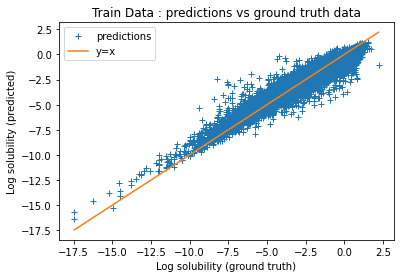

In [327]:
preds = xgboost_model.predict(X_train)
x_y_line = np.linspace(min(y_train), max(y_train), 500)
plt.plot(y_train, preds, '+', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Train Data : predictions vs ground truth data")
plt.legend()

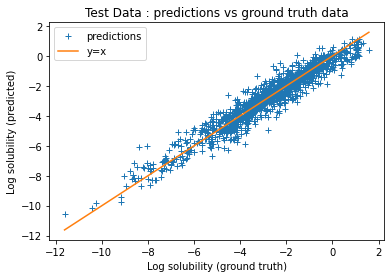

In [332]:
preds = xgboost_model.predict(X_test)
x_y_line = np.linspace(min(y_test), max(y_test), 500)
plt.plot(y_test, preds, '+', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log solubility (ground truth)")
plt.ylabel("Log solubility (predicted)")
plt.title("Test Data : predictions vs ground truth data")
plt.legend()

In [ ]:
### End here ...